In [15]:
# Group Members:
#     Mohammad Anas 20L-1289
#     Fatima Azfar 20L-1027
# Section: BDS-3B
# IDS Assignment 1

File opened successfully.
1.1930336441895875 -3.895780878311793


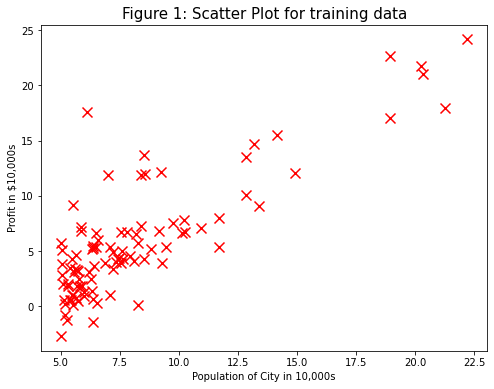

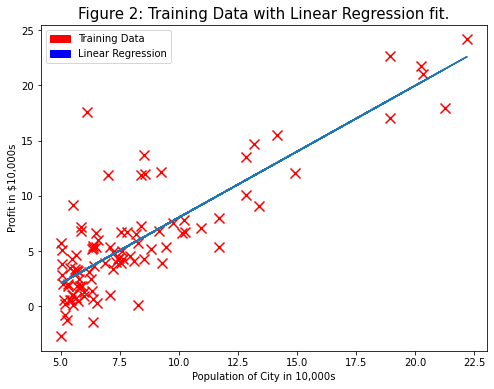

In [16]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

try:
    filename = "ex1data1.txt"
    fd = open(filename , 'r')
    data = fd.readlines() 
    print("File opened successfully.")
    x = [] #population
    y = [] #profit
    for i in range(97): #there are total 97 sets examples in the data
        a = data[i].split(',')
        index = 0
        x.append(float(a[index]))
        y.append(float(a[index+1]))
except:
    print("File not opened successfully.")


plt.figure(figsize=(8,6))    
plt.scatter(x, y, s = 100,color="red", marker = "x")
plt.title("Figure 1: Scatter Plot for training data",fontsize=15)    
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")


def gradient_descent(X, y):
    
    lr=0.01 # learning rate
    m, b =0.33, 0.48 # m is theeta 1 and b is theeta 0.
    N = len(X) # number of samples
    
    for _ in range(10000):      
        f = y - (m*X + b)
        # Updating m and b
        m -= lr * (-2*X.dot(f).sum() / N)
        b -= lr * (-2*f.sum() / N)
    
    return m, b

x_new = np.array(x)
y_new = np.array(y)
m, b = gradient_descent(x_new, y_new)
print(m ,b)
plt.figure(figsize=(8,6))    
plt.scatter(x, y, s = 100,color="red", marker = "x")
plt.title("Figure 2: Training Data with Linear Regression fit.",fontsize=15)    
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

pop_a = mpatches.Patch(color='red', figure = "x", label='Training Data')
pop_b = mpatches.Patch(color='blue', figure = "―", label='Linear Regression')
plt.legend(handles=[pop_a,pop_b])


plt.plot(x_new, m*x_new + b)
plt.show()



File opened successfully.


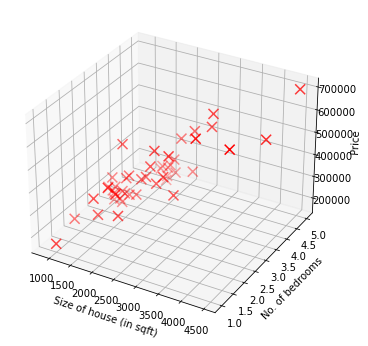

In [17]:
try:
    filename = "ex1data2.txt"
    fd = open(filename , 'r')
    data = fd.readlines() 
    x1 = [] #size
    x2 = [] #number of bedrooms
    y = [] #price
    print("File opened successfully.")
    for i in range(len(data)): #there are total 97 sets examples in the data
        a = data[i].split(',')
        index = 0
        x1.append(float(a[index]))
        x2.append(float(a[index+1]))
        y.append(float(a[index+2]))
except:
    print("File not opened successfully.")
    
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, s = 100, color="red", marker = "x")
ax.set_xlabel('Size of house (in sqft)')
ax.set_ylabel('No. of bedrooms')
ax.set_zlabel('Price')

plt.show()

File opened successfully.
1.5643514852298086e-16 0.8327542415246726 -0.0013771012362838331


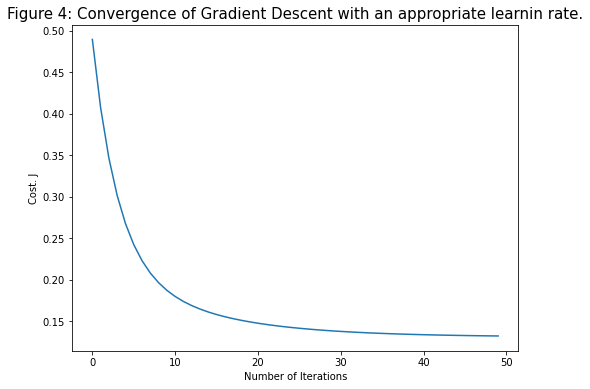

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

try:
    filename = "ex1data2.txt"
    fd = open(filename , 'r')
    data = fd.readlines() 
    x1 = [] #size
    x2 = [] #no. of bedrooms
    y = [] #price
    print("File opened successfully.")
    for i in range(len(data)): #there are total 97 sets examples in the data
        a = data[i].split(',')
        index = 0
        x1.append(float(a[index]))
        x2.append(float(a[index + 1]))
        y.append(float(a[index+2]))
except:
    print("File not opened successfully.")
x1_mean = sum(x1) / len(x1)
x2_mean = sum(x2) / len(x2)
x1_std = statistics.stdev(x1)
x2_std = statistics.stdev(x2)
x1 = [((x - x1_mean) / x1_std) for x in x1]
x2 = [((x - x2_mean) / x2_std) for x in x2]

y_mean = sum(y) / len(y)
y_std = statistics.stdev(y)
y = [((x - y_mean) / y_std) for x in y]

x = []
for i in range(len(x1)):
    x.append([x1[i], x2[i]])
y = np.array(y)

def gradient_descent(X, y, lr, itr, c):
    m = len(y)
    t0, t1, t2 = 0, 0, 0 # m is theeta 1 and b is theeta 0.
    for l in range(itr):
        total1, total2 , total0, total3 = 0, 0, 0, 0
        for i in range(len(y)):
            temp = 0
            temp = ((t0 + (t1 * X[i][0]) + (t2 * X[i][1])) - y[i])
            total0 += temp
            total1 += temp*X[i][0]
            total2 += temp*X[i][1]
            total3 += temp**2
        total3 /= (2*m)
        c.append(total3)

        t0 -= lr*(total0 / m)
        t1 -= lr*(total1 / m)
        t2 -= lr*(total2 / m)
    return t0, t1, t2
        
lr = 0.1
itr = 50
c = []
m1, m2, b= gradient_descent(x, y, lr, itr, c)
print(m1, m2, b)
temp = [i for i in range(itr)]



plt.figure(figsize=(8,6))   
plt.title("Figure 4: Convergence of Gradient Descent with an appropriate learnin rate.",fontsize=15)    
plt.xlabel("Number of Iterations")
plt.ylabel("Cost. J")
plt.plot(temp, c)
plt.show()


In [19]:
def cost_prediction_gradient(area, no_bed):
    area-= x1_mean
    area/= x1_std
    no_bed-= x2_mean
    no_bed/= x2_std

    return (((m1+(m2*area)+(b*no_bed))*y_std)+y_mean)

print(cost_prediction_gradient(1650,3))

294502.5051597591


In [20]:
import numpy as np

try:
    filename = "ex1data2.txt"
    fd = open(filename , 'r')
    data = fd.readlines() 
    x = [] #features
    y = [] #price
    print("File opened successfully.")
    for i in range(len(data)): #there are total 97 sets examples in the data
        a = data[i].split(',')
        index = 0
        x.append([1, float(a[index]), float(a[index+1])])
        y.append(float(a[index+2]))
except:
    print("File not opened successfully.")

x_transpose = np.transpose(x)
theeta=np.dot(np.dot(np.linalg.pinv(np.dot(x_transpose,x)),x_transpose),y)
print(theeta)

File opened successfully.
[89597.82828314   139.2106998  -8738.00303723]


In [21]:
def cost_prediction_normal(area, no_bed):
    return (theeta[0]+(theeta[1]*area)+(theeta[2]*no_bed))
print(cost_prediction_normal(1650,3))


293081.4738352699
